# <center> Практична робота №5 </center>
## **Тема.** Тема. Графи. Ациклічні графи
## **Мета:** набути практичних навичок розв’язання задач топографічного сортування та оцінювання їх асимптотичної складності.
### _Викoнав Данііл Танасієнко 16.12.24_

## <center> Хід роботи </center>
# **1)** (варіант 18) Задано ациклічний граф: {1,2,3,4,5,6,7,8}{(1,2),(1,3),(2,4),(3,5),(4,5),(4,6),(5,7),(6,7),(6,8),(7,8)}. Побудувати граф і розв’язати задачу топологічного сортування за допомогою алгоритму DFS

### 1. Вхідні дані
Граф:
- **Вершини**:  $V = \{1, 2, 3, 4, 5, 6, 7, 8\}$  
- **Ребра**:  $E = \{(1, 2), (1, 3), (2, 4), (3, 5), (4, 5), (4, 6), (5, 7), (6, 7), (6, 8), (7, 8)\}$

---


### 2. Побудова графа
На основі даних будуємо граф у вигляді списку суміжності:

```plaintext
1: [2, 3]
2: [4]
3: [5]
4: [5, 6]
5: [7]
6: [7, 8]
7: [8]
8: []
```

---

#### **3. Алгоритм DFS для топологічного сортування**

1. Використовуємо обхід у глибину (DFS):
   - Позначаємо вершину як відвідану.
   - Рекурсивно обходимо всіх її сусідів.
   - Після завершення обходу додаємо вершину до стеку.
2. По завершенні обходу всі вершини в стеку утворюють топологічний порядок (у зворотному порядку).

---

#### **4. Виконання алгоритму**

#### Ініціалізація:

- **Множина відвіданих вершин**: \( visited = \emptyset \)  
- **Порожній стек**: \( stack = [] \)

#### Кроки виконання:

1. Починаємо з вершини $1$:  
   - Відвідуємо $1$, переходимо до сусіда $2$.

2. Вершина $2$:  
   - Відвідуємо $2$, переходимо до сусіда $4$.

3. Вершина $4$:  
   - Відвідуємо $4$, переходимо до сусідів:  
     - До $5$:  
       Відвідуємо $5$, переходимо до $7$:  
       Відвідуємо $7$, переходимо до $8$:  
       Відвідуємо $8$, додаємо $8$ до стеку.  
       Повертаємося до $7$, додаємо $7$ до стеку.  
       Повертаємося до $5$, додаємо $5$ до стеку.  
     - До $6$:  
       Відвідуємо $6$, переходимо до $8$ (вже відвідано).  
       Додаємо $6$ до стеку.  
   - Повертаємося до $4$, додаємо $4$ до стеку.

4. Повертаємося до $2$, додаємо $2$ до стеку.

5. Повертаємося до $1$, переходимо до $3$.

6. Вершина $3$:  
   - Відвідуємо $3$, переходимо до $5$ (вже відвідано).  
   - Додаємо $3$ до стеку.

7. Повертаємося до $1$, додаємо $1$ до стеку.

#### **5. Результат**

Стек після виконання алгоритму:  
\[ 1, 3, 2, 4, 6, 5, 7, 8 \]

#### Результат

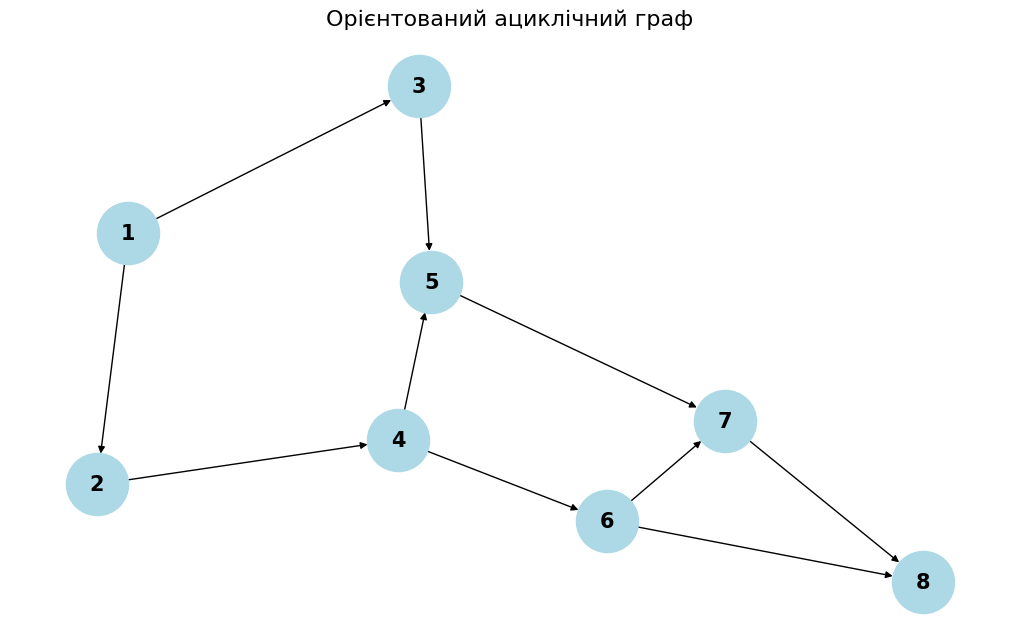

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Вхідні дані: вершини та ребра
vertices = [1, 2, 3, 4, 5, 6, 7, 8]
edges = [(1, 2), (1, 3), (2, 4), (3, 5), (4, 5), (4, 6), (5, 7), (6, 7), (6, 8), (7, 8)]

# Побудова графа
graph = nx.DiGraph()
graph.add_nodes_from(vertices)
graph.add_edges_from(edges)

# Візуалізація графа
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=15, font_weight='bold')
plt.title("Орієнтований ациклічний граф", fontsize=16)
plt.show()

In [7]:
# Алгоритм топологічного сортування за допомогою DFS
def topological_sort_dfs(graph):
    visited = set()
    stack = []

    def dfs(node):
        if node in visited:
            return
        visited.add(node)
        for neighbor in graph[node]:
            dfs(neighbor)
        stack.append(node)

    # Виконуємо DFS для всіх вершин
    for vertex in graph:
        if vertex not in visited:
            dfs(vertex)

    return stack[::-1]  # Зворотній порядок стека

# Створення списку суміжності
adj_list = {node: list(graph.neighbors(node)) for node in graph.nodes}
sorted_vertices = topological_sort_dfs(adj_list)

print("Топологічно відсортовані вершини:", sorted_vertices)

Топологічно відсортовані вершини: [1, 3, 2, 4, 6, 5, 7, 8]


# <center> Контрольні питання </center>

#### **1)** Які переваги і недоліки алгоритму Кана порівняно з алгоритмом DFS для топологічного сортування графа

## Алгоритм Кана
### Переваги:
- **Простота виявлення циклів:** якщо залишилися вузли з ненульовим ступенем, граф має цикл.  
- **Ітеративність:** легко реалізується без рекурсії.  
- **Зручність для великих графів:** використовує чергу для зберігання вузлів із нульовим ступенем.  

### Недоліки:
- **Додаткова пам’ять:** потрібна черга або множина для вузлів із нульовим ступенем.  
- **Менш гнучкий:** складніше адаптувати для задач із додатковою обробкою вузлів.  

---

## Алгоритм DFS
### Переваги:
- **Простота реалізації:** легко написати з використанням рекурсії.  
- **Мінімальна пам’ять:** потрібен лише стек викликів.  
- **Гнучкість:** дозволяє виконувати додаткову обробку вузлів.  

### Недоліки:
- **Складність виявлення циклів:** потрібна додаткова логіка.  
- **Ризик переповнення стеку:** можливий для дуже глибоких графів.  
- **Складніший для відладки:** особливо при рекурсивній реалізації.  

---

| Характеристика          | Алгоритм Кана    | Алгоритм DFS     |
|-------------------------|------------------|------------------|
| Цикли                  | Легко виявити    | Складно виявити  |
| Пам’ять                | Черга/множина    | Стек викликів    |
| Реалізація             | Ітеративна       | Рекурсивна       |
| Ризик переповнення     | Немає            | Є (у рекурсії)   |
| Гнучкість              | Менш гнучкий     | Гнучкий          |



#### **2)** Яка складність часу і пам’яті для кожного з алгоритмів у найгіршому і найкращому випадках?


## Алгоритм Кана
### Часова складність:
- **Найкращий і найгірший випадок:**  
  $O(V + E)$, де $V$ — кількість вузлів, $E$ — кількість ребер.  
  - Алгоритм проходить кожне ребро рівно один раз і виконує одну операцію над кожним вузлом.

### Просторова складність:
- **Найгірший випадок:** $O(V + E)$.  
  - Граф зберігається як список суміжності, плюс використовується черга для вузлів із нульовим вхідним степенем.
- **Найкращий випадок:** $O(V + E)$.  
  - Граф займає основну частину пам’яті незалежно від його структури.

---

## Алгоритм DFS
### Часова складність:
- **Найкращий і найгірший випадок:**  
  $O(V + E)$.  
  - Кожен вузол відвідується один раз, кожне ребро перевіряється один раз.

### Просторова складність:
- **Найгірший випадок:** $O(V)$.  
  - У рекурсивній реалізації стек викликів може містити до $V$ елементів для графів із глибиною $V$.  
  - Для збереження графа використовується $O(V + E)$.
- **Найкращий випадок:** $O(V)$.  
  - У плоских графах стек викликів буде меншим, але основна пам’ять все одно використовується для графа.

---
| Алгоритм       | Часова складність     | Просторова складність |
|----------------|-----------------------|------------------------|
| **Кан**        | $O(V + E)$            | $O(V + E)$             |
| **DFS**        | $O(V + E)$            | $O(V) + O(V + E)$      |


#### **3)** Чи можна застосовувати алгоритм Кана до графів з вагами на ребрах? Як це порівняти з DFS?


- **Алгоритм Кана** не можна застосовувати до графів з вагами на ребрах, оскільки він не враховує ваги під час топологічного сортування.
  
- **DFS** також не враховує ваги для сортування, але більш гнучкий і може бути адаптований для задач, де потрібно працювати з вагами, наприклад, при пошуку найкоротшого шляху.

### Порівняння:
- **Кан:** не підтримує ваги на ребрах.
- **DFS:** не підтримує ваги для сортування, але гнучкіший для адаптацій у задачах з вагами.


#### **4)** Як впливає структура графа на швидкість роботи кожного з цих алгоритмів?

### Алгоритм Кана:
- **Розріджені графи** (мало ребер): швидкість роботи залишається високою, оскільки кожне ребро обробляється один раз.
- **Щільні графи** (багато ребер): швидкість може дещо знизитись через більшу кількість ребер, але складність все одно залишатиметься $O(V + E)$.
- **Циклічні графи**: швидкість не змінюється, але алгоритм не працює для графів із циклами, оскільки не може виконати топологічне сортування.

### Алгоритм DFS:
- **Розріджені графи**: швидкість може бути вищою, оскільки DFS потребує меншої пам'яті і проходить лише необхідні ребра.
- **Щільні графи**: швидкість може знижуватись через великий обсяг оброблених ребер, але складність залишається $O(V + E)$.
- **Циклічні графи**: швидкість може знизитись, якщо не реалізована перевірка на цикли, оскільки DFS може нескінченно зациклитись.

### Порівняння:
- **Кан:** швидкість може падати у щільних графах, але алгоритм не працює для графів із циклами.
- **DFS:** працює з будь-якою структурою графа, однак для циклічних графів потрібно додатково перевіряти наявність циклів.


#### **5)** Чи є обмеження використання кожного алгоритму для певних типів графів або завдань?

### Алгоритм Кана:
- **Обмеження:**
  - **Циклічні графи:** не можна використовувати для графів із циклами, оскільки алгоритм не може виконати топологічне сортування для таких графів.
  - **Графи з вагами на ребрах:** не підходить для задач, де потрібно враховувати ваги на ребрах, оскільки алгоритм Кана не використовує інформацію про ваги.
  
- **Завдання:**
  - Найкраще підходить для задач, де потрібно лише отримати топологічне сортування без додаткової обробки ваг або циклів.

### Алгоритм DFS:
- **Обмеження:**
  - **Циклічні графи:** хоча DFS може працювати з циклічними графами, важливо додатково перевіряти на наявність циклів, щоб уникнути зациклення.
  - **Врахування ваг на ребрах:** DFS не призначений для роботи з вагами на ребрах, якщо це важливо для задачі (наприклад, пошук найкоротшого шляху).
  
- **Завдання:**
  - Підходить для задач, де потрібно не тільки виконати топологічне сортування, але й для задач, що включають пошук компонент зв'язності, пошук циклів, та інші графові задачі.

### Порівняння:
- **Кан:** не підходить для циклічних графів і задач з вагами на ребрах.
- **DFS:** може працювати з будь-якими графами, але потребує додаткових перевірок для циклів і не враховує ваги на ребрах.


#### **6)** Які варіанти оптимізації можна застосувати для кожного алгоритму з метою поліпшення його продуктивності?

### Алгоритм Кана:
1. **Використання черги з пріоритетами (heap):**
   - Якщо потрібно обробляти вузли з певним пріоритетом, можна використовувати чергу з пріоритетами замість звичайної черги для оптимізації порядку обробки вузлів.
   
2. **Паралельне виконання:**
   - Якщо граф має багато незалежних вузлів (тобто з нульовим вхідним степенем), можна паралельно обробляти ці вузли, що дозволить зменшити час виконання.

3. **Оновлення черги ефективніше:**
   - Під час видалення елементів з черги можна використовувати стратегію, що дозволяє швидко перевіряти й оновлювати вхідні степені вузлів, замість того щоб кожен раз перевіряти всі ребра.

4. **Оптимізація збереження графа:**
   - Використання ефективних структур даних для збереження графа (наприклад, список суміжності замість матриці суміжності) може знизити витрати пам'яті.

---

### Алгоритм DFS:
1. **Ітеративна версія (без рекурсії):**
   - Для уникнення проблем із переповненням стеку при глибокій рекурсії можна реалізувати DFS за допомогою явного стека (ітеративно), що дозволить краще контролювати пам'ять.

2. **Мемоізація та кешування:**
   - У задачах, де потрібно кілька разів відвідувати однакові підграфи, можна використовувати мемоізацію, щоб уникнути повторних обчислень і значно прискорити виконання.

3. **Перевірка на цикли під час обходу:**
   - Додатково перевіряти наявність циклів під час обходу, щоб уникнути зайвих обчислень і забезпечити коректність виконання.

4. **Оновлення стану вузлів (некоректні мітки):**
   - Оптимізація міток вузлів, наприклад, перевірка та оновлення статусу вузлів на кожному кроці, дозволяє ефективніше відслідковувати їхні стани (не відвідані, активні, відвідані).

---

### Порівняння оптимізацій:
- **Алгоритм Кана:** основна оптимізація — ефективне управління чергою та обробка незалежних вузлів паралельно.
- **DFS:** оптимізації в основному спрямовані на уникнення переповнення стеку та прискорення обходу завдяки кешуванню та ітеративним підходам.
